In [1]:
from keras.applications.mobilenetv2 import MobileNetV2
from keras.models import Model, load_model
from keras.layers import Dense

from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

import os
import numpy as np
%matplotlib inline
from lib.confusion_matrix_pretty_print import pretty_plot_confusion_matrix

Using TensorFlow backend.


In [2]:
savez = np.load("data.npz")
x_train = savez["x_train"]
y_train = savez["y_train"]
x_test = savez["x_test"]
y_test = savez["y_test"]
out_classes = savez["out_classes"]

In [4]:
# reload model
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(96, 96, 3),
                         pooling='avg')
predictions = Dense(len(out_classes), activation='softmax')(base_model.outputs[0])
model = Model(inputs=base_model.input, outputs=predictions)
model.load_weights("mobilenet_curve.h5")

In [6]:
# predict on testing
pred = model.predict(x=x_test)
y_pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [7]:
confusion = confusion_matrix(y_test, y_pred, [i for i in range(len(out_classes))])
df = pd.DataFrame(data=confusion, index=out_classes, columns=out_classes)

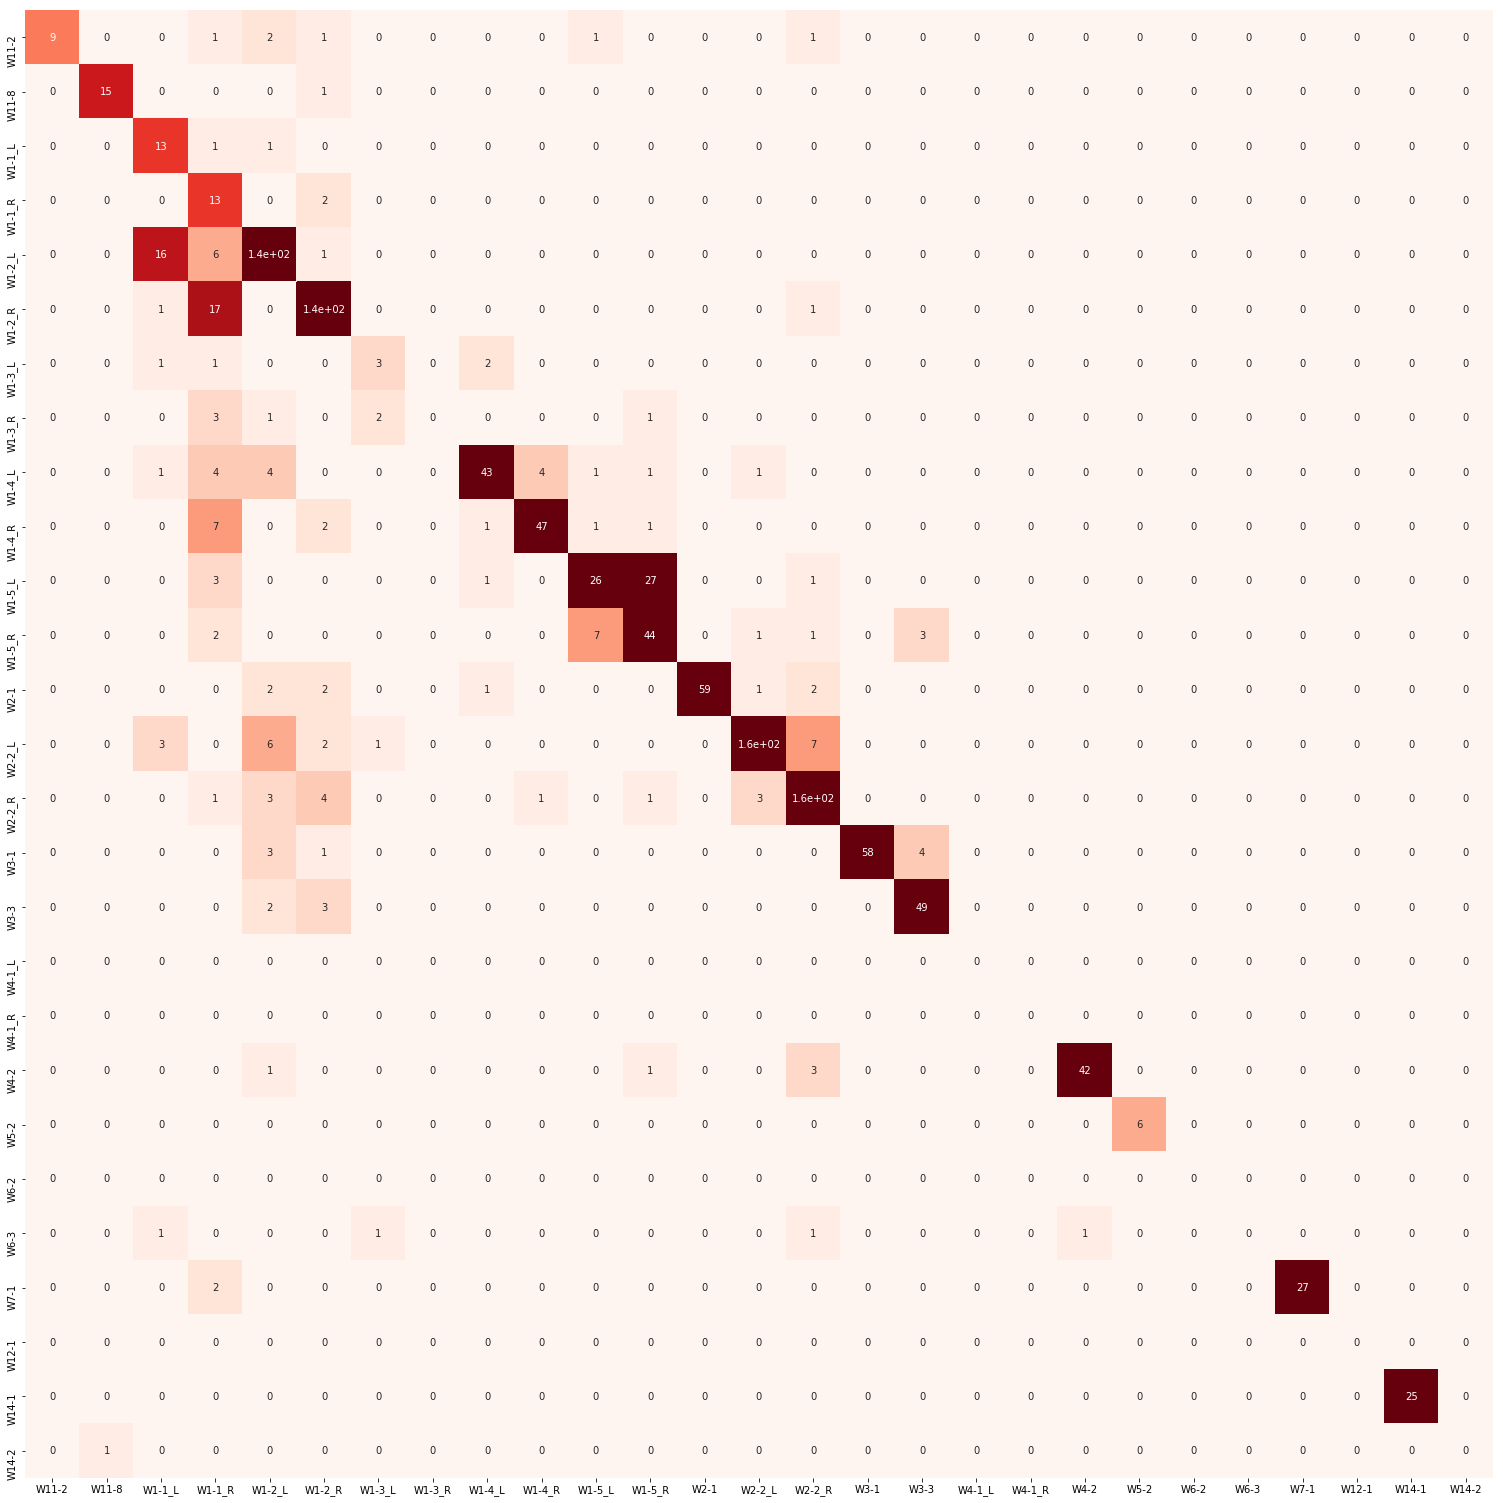

In [8]:
plt.figure(figsize=confusion.shape)
sn.heatmap(df, annot=True, cbar=False, square=True, vmax=20, cmap='Reds')
plt.savefig('confusion.png')
plt.show()

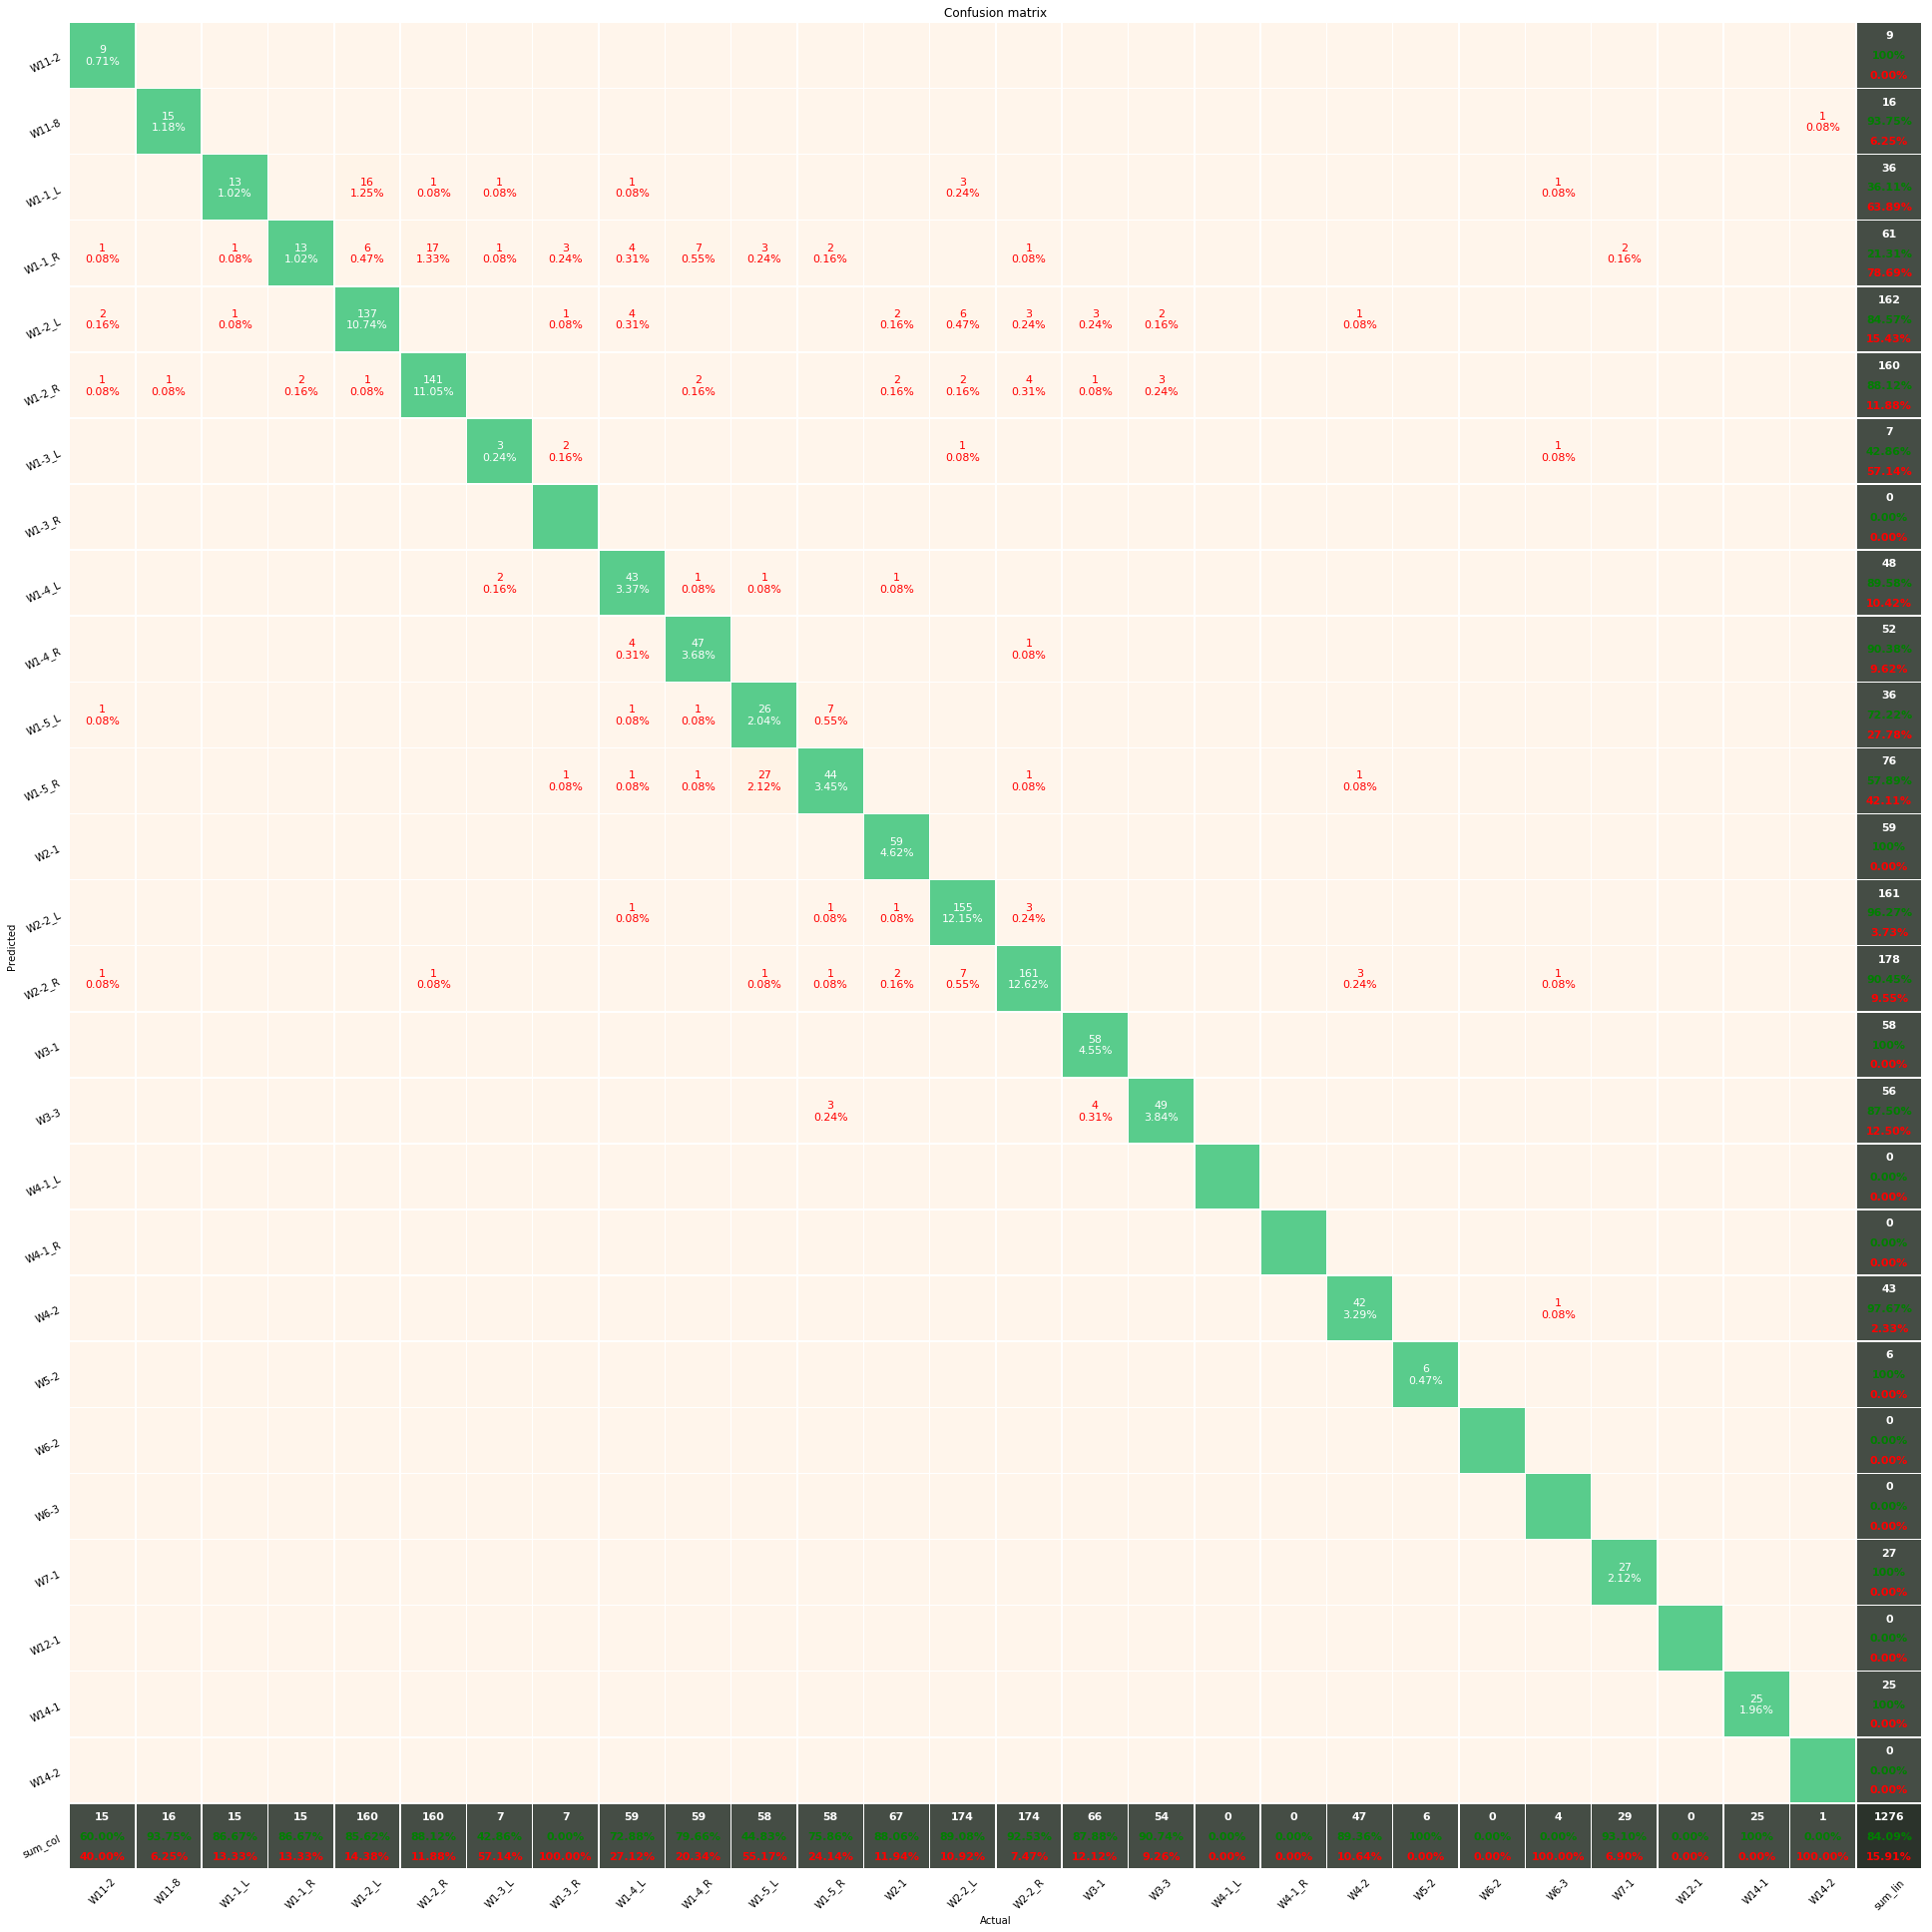

In [9]:
pretty_plot_confusion_matrix(df, figsize=df.shape)
